In [1]:
# Most Important 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

### Apply CNN

`Fashion MNSIT`

In [3]:
## load the Dataset

### Building a Sequential API for multiclass Classification

## loading the Fashion MNIST 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## show shapes, dtypes and transfer datatypes to (float32, enough for NN)
## and rescale the inputs to be from (0-1)

X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')

X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

## split train to train & val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.1, shuffle=True)


print('X_train_full shape =>', X_train_full.shape)
print('y_train_full shape =>', y_train_full.shape)
print('==='*15)
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('==='*15)
print('X_val shape =>', X_val.shape)
print('y_val shape =>', y_val.shape)
print('==='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)
print('==='*25)
print('X_train , y_train -- dtypes =>', (X_train.dtype, y_train.dtype))
print('X_val , y_val -- dtypes =>', (X_val.dtype, y_val.dtype))
print('X_test , y_test -- dtypes =>', (X_test.dtype, y_test.dtype))

X_train_full shape => (60000, 28, 28)
y_train_full shape => (60000,)
X_train shape => (54000, 28, 28)
y_train shape => (54000,)
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
X_test shape => (10000, 28, 28)
y_test shape => (10000,)
X_train , y_train -- dtypes => (dtype('float32'), dtype('int32'))
X_val , y_val -- dtypes => (dtype('float32'), dtype('int32'))
X_test , y_test -- dtypes => (dtype('float32'), dtype('int32'))


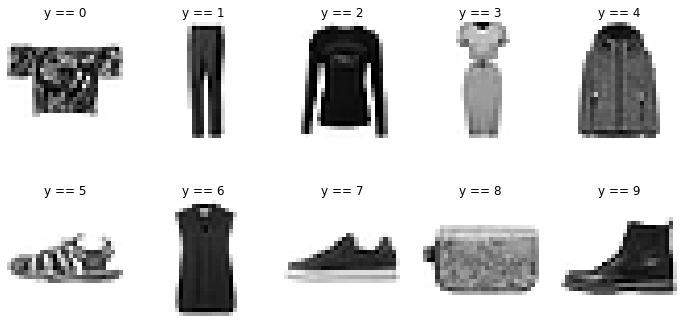

In [4]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])

## get first index only i need only one unique value to test to 
## what this number belong to what photo (i hope you understand me)
## although the images are diffrent for each class_name < like (coats have diffrent images)
## but still have the same number of target, that what i only want

img_indicies = {}

for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]   

    
keys = list(img_indicies.keys())

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

plt.sca(ax[0,0])
plt.imshow(X_train[img_indicies[0]], cmap='binary')
plt.title(f'y == {keys[0]}')
plt.axis('off')
plt.sca(ax[0,1])
plt.imshow(X_train[img_indicies[1]], cmap='binary')
plt.title(f'y == {keys[1]}')
plt.axis('off')
plt.sca(ax[0,2])
plt.imshow(X_train[img_indicies[2]], cmap='binary')
plt.title(f'y == {keys[2]}')
plt.axis('off')
plt.sca(ax[0,3])
plt.imshow(X_train[img_indicies[3]], cmap='binary')
plt.title(f'y == {keys[3]}')
plt.axis('off')
plt.sca(ax[0,4])
plt.imshow(X_train[img_indicies[4]], cmap='binary')
plt.title(f'y == {keys[4]}')
plt.axis('off')

###################
plt.sca(ax[1,0])
plt.imshow(X_train[img_indicies[5]], cmap='binary')
plt.title(f'y == {keys[5]}')
plt.axis('off')
plt.sca(ax[1,1])
plt.imshow(X_train[img_indicies[6]], cmap='binary')
plt.title(f'y == {keys[6]}')
plt.axis('off')
plt.sca(ax[1,2])
plt.imshow(X_train[img_indicies[7]], cmap='binary')
plt.title(f'y == {keys[7]}')
plt.axis('off')
plt.sca(ax[1,3])
plt.imshow(X_train[img_indicies[8]], cmap='binary')
plt.title(f'y == {keys[8]}')
plt.axis('off')
plt.sca(ax[1,4])
plt.imshow(X_train[img_indicies[9]], cmap='binary')
plt.title(f'y == {keys[9]}')
plt.axis('off')
plt.show()

In [5]:
### you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle_Boot']


## you can now work like this

print('y_train in row 1 =>', y_train[0])
print('get its corresponding class =>', class_names[y_train[0]])

y_train in row 1 => 5
get its corresponding class => Sandal


### CNN architecture

In [6]:
### i will use conv2d , so i will extend dimension to be (batch_size, 28, 28, 1)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print('X_train =>', X_train.shape)
print('X_val =>', X_val.shape)
print('X_test =>', X_test.shape)  ## what i need

X_train => (54000, 28, 28, 1)
X_val => (6000, 28, 28, 1)
X_test => (10000, 28, 28, 1)


In [7]:
## Define the Model
model_fashion = tf.keras.models.Sequential([
    ## conv base
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='elu', 
                          kernel_initializer='he_normal', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', 
                           activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', 
                           activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', 
                           activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    ## top classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),   ## add a dropout
    tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),    ## add a dropout
    tf.keras.layers.Dense(10, activation='softmax')                                    
])

## Prepare the Hyperparameters
n_epochs = 20
n_batch_size = 32
s = n_epochs * len(X_train) // n_batch_size

## create Learning_rate with Exponential Scheduling
lr_exponential = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                                decay_rate=0.1, decay_steps=s)
optimizer_exp = tf.keras.optimizers.SGD(learning_rate=lr_exponential)

## complile the Model
model_fashion.compile(loss='sparse_categorical_crossentropy', 
                      optimizer=optimizer_exp, 
                      metrics=['accuracy'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

   


model_fashion.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [8]:
## fit the Model
history = model_fashion.fit(X_train, y_train, 
                            validation_data=(X_val, y_val), epochs=n_epochs,
                            batch_size=n_batch_size, callbacks=[early_stopp])

Epoch 1/20
1688/1688 [==============================] - 26s 13ms/step - loss: 0.6034 - accuracy: 0.7846 - val_loss: 0.3687 - val_accuracy: 0.8657
Epoch 2/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.3925 - accuracy: 0.8607 - val_loss: 0.3572 - val_accuracy: 0.8718
Epoch 3/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.3376 - accuracy: 0.8801 - val_loss: 0.3056 - val_accuracy: 0.8902
Epoch 4/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.3026 - accuracy: 0.8925 - val_loss: 0.2847 - val_accuracy: 0.8997
Epoch 5/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2785 - accuracy: 0.9001 - val_loss: 0.2902 - val_accuracy: 0.8973
Epoch 6/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2605 - accuracy: 0.9068 - val_loss: 0.2895 - val_accuracy: 0.8983
Epoch 7/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2460 - accuracy: 0.9120 - val_loss: 0.2641 -

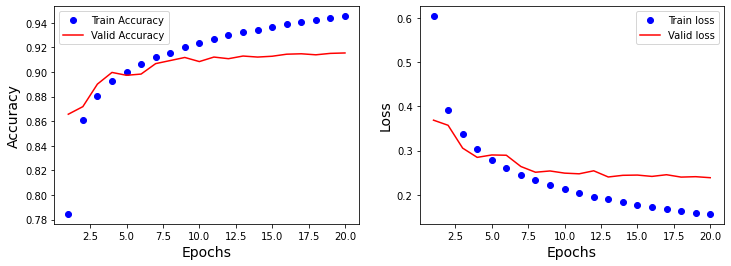

In [9]:
## Visualize the resutls
fia, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [10]:
## Evaluate on test_set
loss_test, acc_test = model_fashion.evaluate(X_test, y_test, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)   ## Not Bad!

loss_test => 0.2563651502132416
acc_test => 0.9117000102996826


### Let's reshape into video data
### here, we want for each 10 frame of video only one label
`If we want to train video data`  <br />
`## assume 10 frames/sec and we will adjust the MNIST dataset to be like that`

#### In this case, we are `grouping/summarizing` every 10 frames into one video, which can have `one label`

##### So we need to take the last labels of every 10 as the video label

In [11]:
## assume 10 frames/sec and we will adjust the MNIST dataset to be like that

X_train_vid = np.reshape(X_train, (5400, 10, 28, 28, 1))
## batch_size x frames/sec x height x width x channells
y_train_vid = np.reshape(y_train, (54000,))
X_val_vid = np.reshape(X_val, (600, 10, 28, 28, 1))
y_val_vid = np.reshape(y_val, (6000,))
X_test_vid = np.reshape(X_test, (1000, 10, 28, 28, 1))
y_test_vid = np.reshape(y_test, (10000,))


## for y
y_train_vid = y_train_vid[::10]   ## one label for each 10 frames --> train
y_val_vid = y_val_vid[::10]       ## one label for each 10 frames --> validation
y_test_vid = y_test_vid[::10]     ## one label for each 10 frames --> test

print('X_train_vid shape', X_train_vid.shape)
print('y_train_vid shape', y_train_vid.shape)
print('X_val_vid shape', X_val_vid.shape)
print('y_val_vid shape', y_val_vid.shape)
print('X_test_vid shape', X_test_vid.shape)
print('y_test_vid shape', y_test_vid.shape)

X_train_vid shape (5400, 10, 28, 28, 1)
y_train_vid shape (5400,)
X_val_vid shape (600, 10, 28, 28, 1)
y_val_vid shape (600,)
X_test_vid shape (1000, 10, 28, 28, 1)
y_test_vid shape (1000,)


In [12]:
## Define the Model
model_fashion_vid = tf.keras.models.Sequential([
      ## conv base
      tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(filters=32, kernel_size=3, 
                                                            strides=1, padding='same', activation='elu', 
                                                            kernel_initializer='he_normal'), 
                                    input_shape=(10, 28, 28, 1)),
      tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),
      tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', 
                                                            activation='elu', kernel_initializer='he_normal')),
      tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),
      tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', 
                                                            activation='elu', kernel_initializer='he_normal')),
      tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),
      tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', 
                                                            activation='elu', kernel_initializer='he_normal')),
      tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D(pool_size=(2,2))),

      ## top classifier
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
      tf.keras.layers.Dropout(0.3),   ## add a dropout
      tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
      tf.keras.layers.Dropout(0.3),    ## add a dropout
      tf.keras.layers.Dense(10, activation='softmax')                                    
])




model_fashion_vid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 28, 28, 32)   320       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 14, 14, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 14, 14, 64)   18496     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 7, 7, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 7, 7, 128)   

In [13]:
## train and fit the model again

## Prepare the Hyperparameters
n_epochs = 20
n_batch_size = 32
s = n_epochs * len(X_train) // n_batch_size

## create Learning_rate with Exponential Scheduling
lr_exponential = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                                decay_rate=0.1, decay_steps=s)
optimizer_exp = tf.keras.optimizers.SGD(learning_rate=lr_exponential)


## complile the Model
model_fashion_vid.compile(loss='sparse_categorical_crossentropy', 
                        optimizer=optimizer_exp, 
                         metrics=['accuracy'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## fit the Model
history_vid = model_fashion_vid.fit(X_train_vid, y_train_vid, 
                                    validation_data=(X_val_vid, y_val_vid), epochs=n_epochs,
                                    batch_size=n_batch_size, callbacks=[early_stopp])

Epoch 1/20
169/169 [==============================] - 9s 49ms/step - loss: 1.8675 - accuracy: 0.3526 - val_loss: 0.9923 - val_accuracy: 0.6350
Epoch 2/20
169/169 [==============================] - 8s 45ms/step - loss: 0.9858 - accuracy: 0.6374 - val_loss: 0.7235 - val_accuracy: 0.7533
Epoch 3/20
169/169 [==============================] - 8s 46ms/step - loss: 0.7743 - accuracy: 0.7183 - val_loss: 0.6517 - val_accuracy: 0.7550
Epoch 4/20
169/169 [==============================] - 8s 45ms/step - loss: 0.6414 - accuracy: 0.7589 - val_loss: 0.5841 - val_accuracy: 0.7917
Epoch 5/20
169/169 [==============================] - 8s 45ms/step - loss: 0.5724 - accuracy: 0.7900 - val_loss: 0.5389 - val_accuracy: 0.7967
Epoch 6/20
169/169 [==============================] - 8s 46ms/step - loss: 0.5170 - accuracy: 0.8113 - val_loss: 0.5179 - val_accuracy: 0.7983
Epoch 7/20
169/169 [==============================] - 8s 45ms/step - loss: 0.4509 - accuracy: 0.8352 - val_loss: 0.4868 - val_accuracy: 0.8167

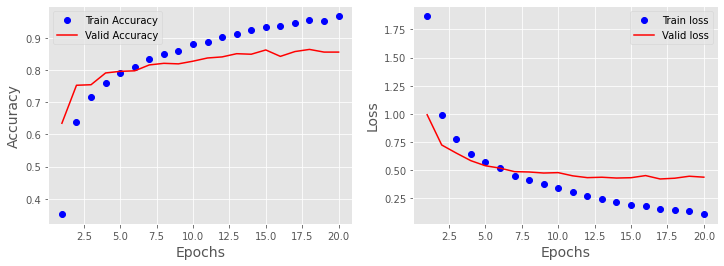

In [14]:
## Visualize the resutls
n_epochs = len(history_vid.history['accuracy'])

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history_vid.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history_vid.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history_vid.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history_vid.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [15]:
## Evaluate on test_set
loss_test, acc_test = model_fashion_vid.evaluate(X_test_vid, y_test_vid, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)   ## Increse Epochs ...

loss_test => 0.5032299160957336
acc_test => 0.8309999704360962


### If we wanted to have classification per each frame

In [16]:
## prepare the data
## assume 10 frames/sec and we will adjust the MNIST dataset to be like that

X_train_frame = np.reshape(X_train, (5400, 10, 28, 28))
y_train_frame = np.reshape(y_train, (5400, 10, 1))
X_val_frame = np.reshape(X_val, (600, 10, 28, 28))
y_val_frame = np.reshape(y_val, (600, 10, 1))
X_test_frame = np.reshape(X_test, (1000, 10, 28, 28))
y_test_frame = np.reshape(y_test, (1000, 10, 1))


print('X_train_frame shape', X_train_frame.shape)
print('y_train_frame shape', y_train_frame.shape)
print('X_val_frame shape', X_val_frame.shape)
print('y_val_frame shape', y_val_frame.shape)
print('X_test_frame shape', X_test_frame.shape)
print('y_test_frame shape', y_test_frame.shape)

X_train_frame shape (5400, 10, 28, 28)
y_train_frame shape (5400, 10, 1)
X_val_frame shape (600, 10, 28, 28)
y_val_frame shape (600, 10, 1)
X_test_frame shape (1000, 10, 28, 28)
y_test_frame shape (1000, 10, 1)


In [17]:
## build the  model
   
### call TimeDistributed --> for each instance we have 10 frames and for each frame there is an output
model_fashion_frame = tf.keras.models.Sequential([
        ## the total model but distributed over 10 frames --> shape (10, 28, 28, 1)
        tf.keras.layers.TimeDistributed(model_fashion, input_shape=(10, 28, 28, 1))
])

model_fashion_frame.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, 10, 10)           496050    
 tributed)                                                       
                                                                 
Total params: 496,050
Trainable params: 496,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
## Prepare the Hyperparameters
n_epochs = 20
n_batch_size = 32
s = n_epochs * len(X_train) // n_batch_size

## create Learning_rate with Exponential Scheduling
lr_exponential = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                                decay_rate=0.1, decay_steps=s)
optimizer_exp = tf.keras.optimizers.SGD(learning_rate=lr_exponential)

## complile the Model
model_fashion_frame.compile(loss='sparse_categorical_crossentropy', 
                            optimizer=optimizer_exp, 
                            metrics=['accuracy'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## fit the Model
history_frame = model_fashion_frame.fit(X_train_frame, y_train_frame, 
                                       validation_data=(X_val_frame, y_val_frame), epochs=n_epochs,
                                       batch_size=n_batch_size)

Epoch 1/20
169/169 [==============================] - 8s 40ms/step - loss: 0.1573 - accuracy: 0.9443 - val_loss: 0.2378 - val_accuracy: 0.9158
Epoch 2/20
169/169 [==============================] - 7s 39ms/step - loss: 0.1541 - accuracy: 0.9454 - val_loss: 0.2399 - val_accuracy: 0.9165
Epoch 3/20
169/169 [==============================] - 6s 38ms/step - loss: 0.1533 - accuracy: 0.9452 - val_loss: 0.2538 - val_accuracy: 0.9128
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 0.1510 - accuracy: 0.9469 - val_loss: 0.2464 - val_accuracy: 0.9158
Epoch 5/20
169/169 [==============================] - 7s 39ms/step - loss: 0.1498 - accuracy: 0.9473 - val_loss: 0.2413 - val_accuracy: 0.9152
Epoch 6/20
169/169 [==============================] - 6s 38ms/step - loss: 0.1485 - accuracy: 0.9479 - val_loss: 0.2514 - val_accuracy: 0.9123
Epoch 7/20
169/169 [==============================] - 6s 38ms/step - loss: 0.1431 - accuracy: 0.9499 - val_loss: 0.2411 - val_accuracy: 0.9175

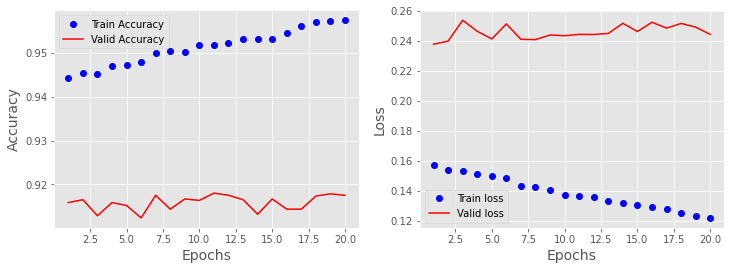

In [19]:
## Visualize the resutls
n_epochs = len(history_frame.history['accuracy'])

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history_frame.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history_frame.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history_frame.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history_frame.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()   ## you need to Tune that

In [20]:
## Evaluate on test_set
loss_test, acc_test = model_fashion_frame.evaluate(X_test_frame, y_test_frame, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)   

loss_test => 0.2643449604511261
acc_test => 0.9126999974250793


#### Done!